#### imports

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Task

- *Load the MNIST dataset. Split it into training, validation, and test sets. Apply PCA for dimensionality reduction.*
- *Cluster the dataset using K-Means. Identify the optimal number of clusters.*

## importing and splitting the data

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000, random_state=42)

## model training

- applying PCA

In [8]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
print(f'Number of components after PCA: {pca.n_components_}')

Number of components after PCA: 154


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=3, random_state=42)

## finding optimal number of clusters

- elbow method

In [22]:
inertia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

- silhouette method

In [19]:
silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    score = silhouette_score(X_train_pca, kmeans.labels_)
    silhouette_scores.append(score)

- results

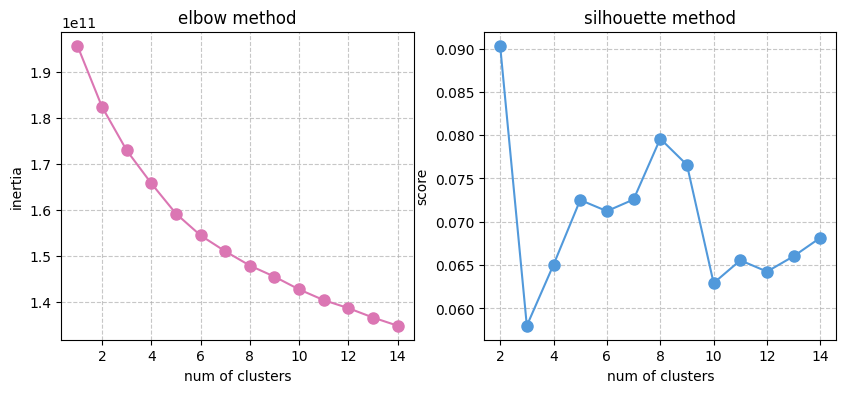

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(K, inertia, marker='o', linestyle='-',
            markersize=8, color='#db76b3')
axs[0].set_xlabel('num of clusters')
axs[0].set_ylabel('inertia')
axs[0].set_title('elbow method')
axs[0].grid(linestyle='--', alpha=0.7)

axs[1].plot(range(2, 15), silhouette_scores, marker='o', linestyle='-',
            markersize=8, color='#5199db')
axs[1].set_xlabel('num of clusters')
axs[1].set_ylabel('score')
axs[1].set_title('silhouette method')
axs[1].grid(linestyle='--', alpha=0.7)

plt.show()

## conclusion

For elbow method perfect num of clusters is the point where the graph "bends",\
and for silhouette method best num is the point with the highest value of the silhouette score, but since 2 clusters can't be the right choise and we should choose the second highest value.\
I think best options for elbow methods would be 5 or 6 clusters, cause bigger values make much smaller difference depending on graph.\
For silhouette method it's obvious that best number of clusters will be 8.


I did some research to figure out what's the difference between these two methods and here's what I find out:
- elbow method's adding more data samples that mostly doesn't change cluster membership
- silhouette score determines whether there're large gaps between each sample
- the elbow method does not work well if the data is not very clustered
- sometimes it's hard to find the best num of clusters by elbow method graph\
(to see where the graph becomes linear)
- if there're lots of duplicate data the silhouette coefficient works better, since it identifies the duplicate data\

so:\
*for simple and noise-free dataset - elbow method\
for higher accuracy of getting a num of clusters - silhouette method*

sources:
- https://vitalflux.com/elbow-method-silhouette-score-which-better/
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=dataset%20is%203.-,Silhouette%20Analysis,scikit%2Dlearn%2Fsklearn%20library.
- https://adria708.medium.com/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee
- https://www.youtube.com/watch?v=wW1tgWtkj4I

Thanks for attention!